In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, ShuffleSplit
from sklearn.metrics import confusion_matrix , accuracy_score, precision_score, recall_score , f1_score
from sklearn.metrics import roc_auc_score

In [80]:
# Chargement des données sur le cancer du sein
data = pd.read_csv(r"breast_cancer.csv")
data

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
678,3,1,1,1,3,2,1,1,1,2
679,2,1,1,1,2,1,1,1,1,2
680,5,10,10,3,7,3,8,10,2,4
681,4,8,6,4,3,4,10,6,1,4


In [81]:
# Nettoyage des données
duplicates = data.copy()
duplicates.drop_duplicates(inplace=True)
print("Dupliqué: ", data.shape[0] - duplicates.shape[0])
data = duplicates.copy()

Dupliqué:  234


In [82]:
# Affichage des premières lignes
data.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [83]:
# Connaitre la dimension des données
data.shape

(449, 10)

In [84]:
# Lister les colonnes
data.columns

Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [85]:
# Description statistique des données sous forme de tableau
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Clump Thickness,449.0,5.378619,2.869029,1.0,3.0,5.0,8.0,10.0
Uniformity of Cell Size,449.0,4.222717,3.251280,1.0,1.0,3.0,7.0,10.0
Uniformity of Cell Shape,449.0,4.273942,3.141494,1.0,1.0,3.0,7.0,10.0
Marginal Adhesion,449.0,3.746102,3.158413,1.0,1.0,3.0,6.0,10.0
Single Epithelial Cell Size,449.0,3.879733,2.456544,1.0,2.0,3.0,5.0,10.0
Bare Nuclei,449.0,4.806236,3.880509,1.0,1.0,3.0,10.0,10.0
Bland Chromatin,449.0,4.200445,2.651634,1.0,2.0,3.0,7.0,10.0
Normal Nucleoli,449.0,3.828508,3.387146,1.0,1.0,2.0,7.0,10.0
Mitoses,449.0,1.913140,2.068909,1.0,1.0,1.0,2.0,10.0
Class,449.0,3.051225,0.999801,2.0,2.0,4.0,4.0,4.0


In [86]:
# Afficher toutes les informations sur le DataFrame 
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 449 entries, 0 to 682
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              449 non-null    int64
 1   Uniformity of Cell Size      449 non-null    int64
 2   Uniformity of Cell Shape     449 non-null    int64
 3   Marginal Adhesion            449 non-null    int64
 4   Single Epithelial Cell Size  449 non-null    int64
 5   Bare Nuclei                  449 non-null    int64
 6   Bland Chromatin              449 non-null    int64
 7   Normal Nucleoli              449 non-null    int64
 8   Mitoses                      449 non-null    int64
 9   Class                        449 non-null    int64
dtypes: int64(10)
memory usage: 38.6 KB


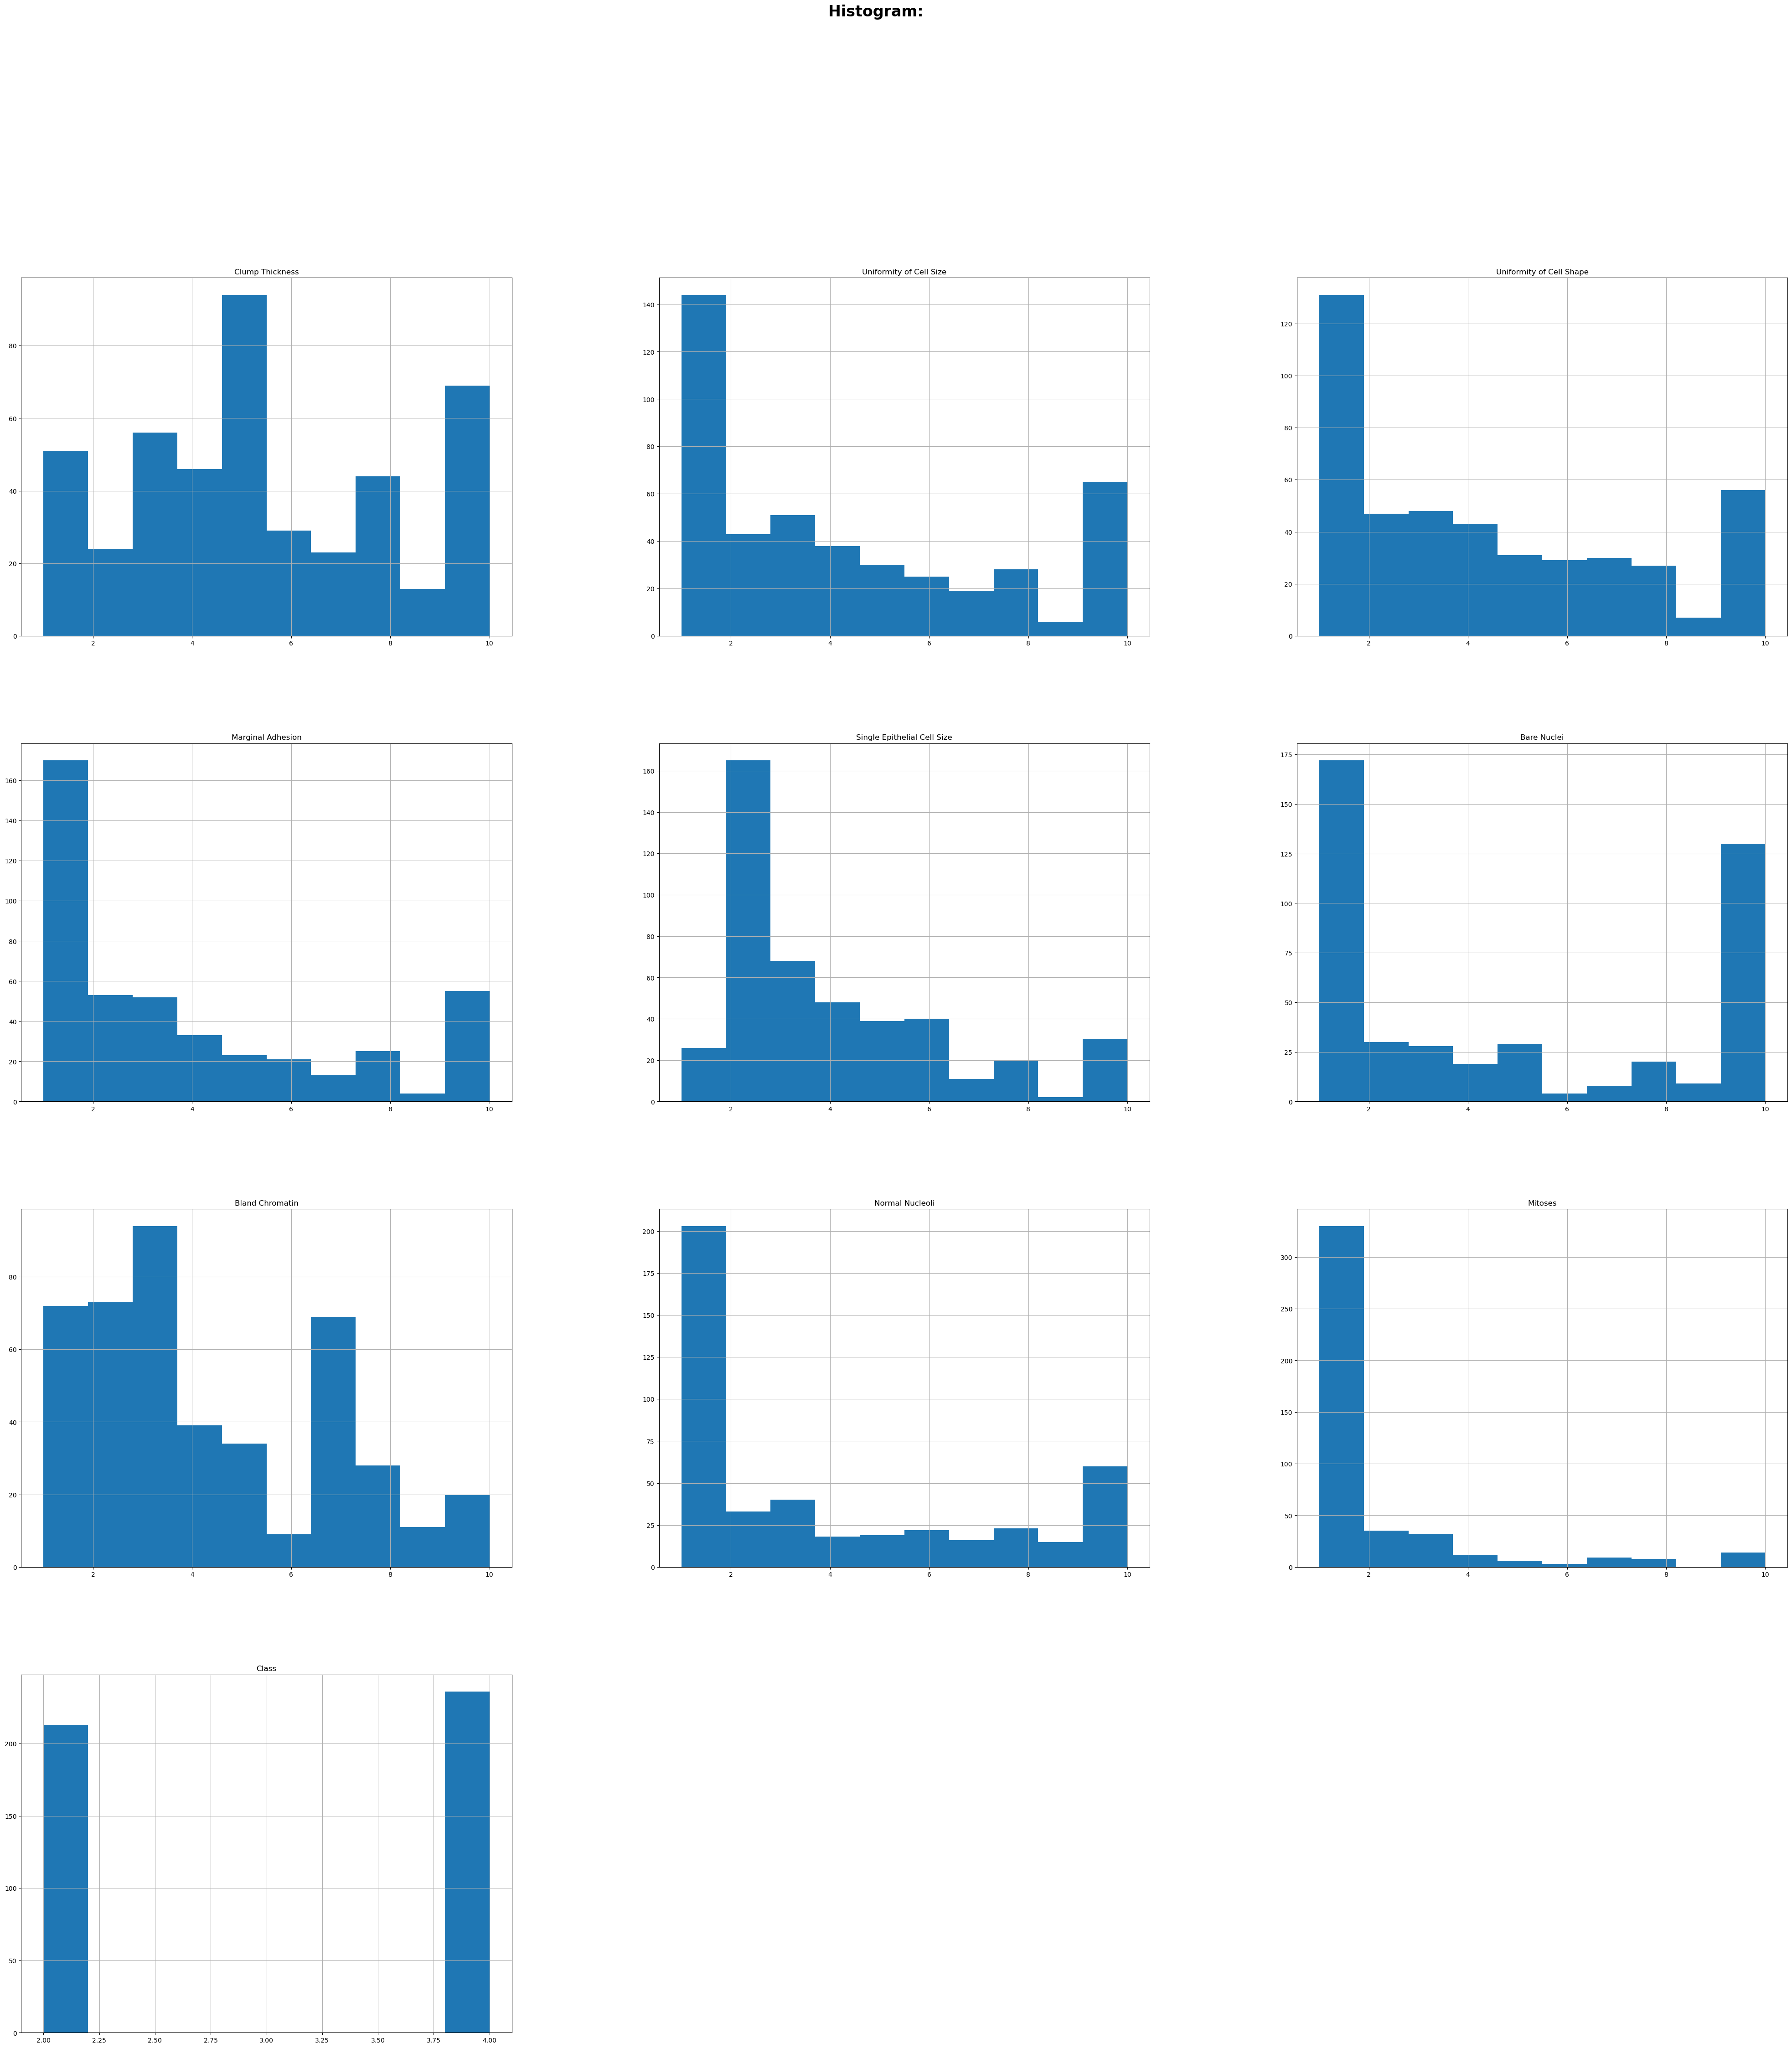

In [87]:
# Représentation de chaque colonne en histogramme
data.hist(bins=10, figsize=(50, 50), grid=True)
hist_features = plt.suptitle('Histogram:', 
                              y = 1, 
                              fontsize = 24, 
                              fontweight = 'bold')     

In [88]:
data['Class'] = data['Class'].replace({2:"Benigne", 4:"Maligne"})
data['Class'].value_counts()

Class
Maligne    236
Benigne    213
Name: count, dtype: int64

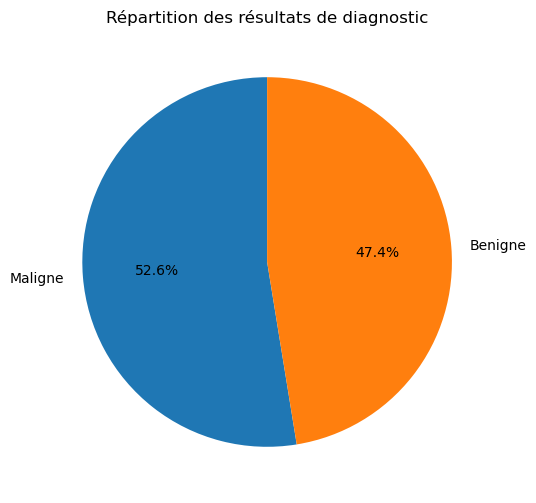

In [89]:
plt.figure(figsize=(6,6))
data['Class'].value_counts().plot(kind='pie', autopct='%1.1f%%' , startangle = 90)
plt.title('Répartition des résultats de diagnostic')
plt.ylabel('')
plt.show()

In [90]:
data['Class'] = data['Class'].replace({"Benigne":2, "Maligne":4})
X = data.drop('Class', axis=1)
X

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
677,3,1,1,1,2,1,2,1,2
678,3,1,1,1,3,2,1,1,1
680,5,10,10,3,7,3,8,10,2
681,4,8,6,4,3,4,10,6,1


In [91]:
Y = data['Class']
Y

0      2
1      2
2      2
3      2
4      2
      ..
677    2
678    2
680    4
681    4
682    4
Name: Class, Length: 449, dtype: int64

In [92]:
X.shape , Y.shape

((449, 9), (449,))

In [93]:
# data['Class'] = data['Class'].replace({"Benigne":2, "Maligne":4})
data.corr()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Clump Thickness,1.000000,0.570750,0.584082,0.379143,0.429917,0.508838,0.485863,0.444267,0.294359,0.670230
Uniformity of Cell Size,0.570750,1.000000,0.876916,0.638499,0.689472,0.590451,0.710705,0.650262,0.403411,0.758697
Uniformity of Cell Shape,0.584082,0.876916,1.000000,0.612859,0.650156,0.618310,0.684466,0.650739,0.381447,0.759500
Marginal Adhesion,0.379143,0.638499,0.612859,1.000000,0.517930,0.590790,0.610571,0.510035,0.356659,0.630415
Single Epithelial Cell Size,0.429917,0.689472,0.650156,0.517930,1.000000,0.479915,0.554047,0.555774,0.434059,0.611432
Bare Nuclei,0.508838,0.590451,0.618310,0.590790,0.479915,1.000000,0.607716,0.478238,0.258691,0.760278
Bland Chromatin,0.485863,0.710705,0.684466,0.610571,0.554047,0.607716,1.000000,0.604527,0.278639,0.706738
Normal Nucleoli,0.444267,0.650262,0.650739,0.510035,0.555774,0.478238,0.604527,1.000000,0.373095,0.645257
Mitoses,0.294359,0.403411,0.381447,0.356659,0.434059,0.258691,0.278639,0.373095,1.000000,0.357184
Class,0.670230,0.758697,0.759500,0.630415,0.611432,0.760278,0.706738,0.645257,0.357184,1.000000


In [94]:
data.corr()['Class'].sort_values(ascending=False)     

Class                          1.000000
Bare Nuclei                    0.760278
Uniformity of Cell Shape       0.759500
Uniformity of Cell Size        0.758697
Bland Chromatin                0.706738
Clump Thickness                0.670230
Normal Nucleoli                0.645257
Marginal Adhesion              0.630415
Single Epithelial Cell Size    0.611432
Mitoses                        0.357184
Name: Class, dtype: float64

In [95]:
X.corr()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
Clump Thickness,1.000000,0.570750,0.584082,0.379143,0.429917,0.508838,0.485863,0.444267,0.294359
Uniformity of Cell Size,0.570750,1.000000,0.876916,0.638499,0.689472,0.590451,0.710705,0.650262,0.403411
Uniformity of Cell Shape,0.584082,0.876916,1.000000,0.612859,0.650156,0.618310,0.684466,0.650739,0.381447
Marginal Adhesion,0.379143,0.638499,0.612859,1.000000,0.517930,0.590790,0.610571,0.510035,0.356659
Single Epithelial Cell Size,0.429917,0.689472,0.650156,0.517930,1.000000,0.479915,0.554047,0.555774,0.434059
Bare Nuclei,0.508838,0.590451,0.618310,0.590790,0.479915,1.000000,0.607716,0.478238,0.258691
Bland Chromatin,0.485863,0.710705,0.684466,0.610571,0.554047,0.607716,1.000000,0.604527,0.278639
Normal Nucleoli,0.444267,0.650262,0.650739,0.510035,0.555774,0.478238,0.604527,1.000000,0.373095
Mitoses,0.294359,0.403411,0.381447,0.356659,0.434059,0.258691,0.278639,0.373095,1.000000


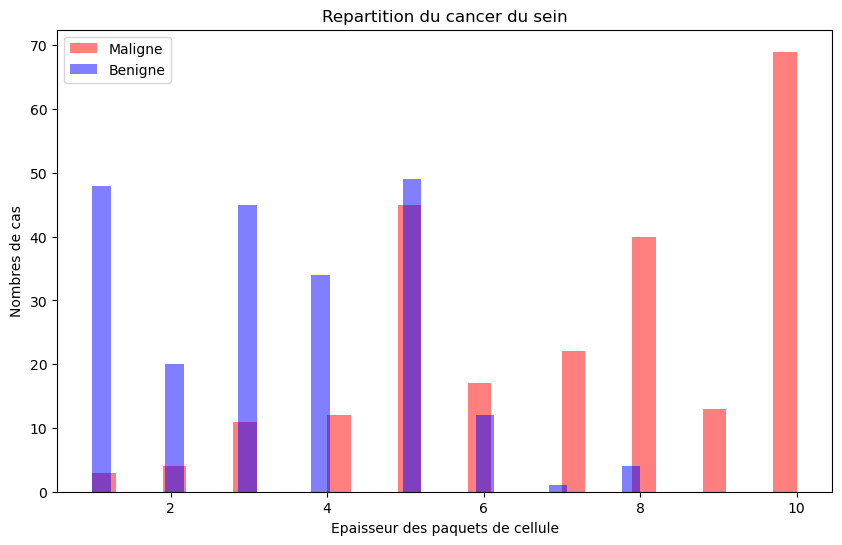

In [96]:
plt.figure(figsize=(10, 6))
plt.hist(data[data['Class'] == 4]['Clump Thickness'], bins=30, alpha=0.5, label='Maligne', color='r')
plt.hist(data[data['Class'] == 2]['Clump Thickness'], bins=30,alpha=0.5, label='Benigne', color='b')
plt.xlabel('Epaisseur des paquets de cellule')
plt.ylabel('Nombres de cas')
plt.legend()
plt.title('Repartition du cancer du sein')
plt.show()


In [105]:
# Séparation des données en ensembles de formation et de test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1) 
X_test

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
400,3,3,2,6,3,3,3,5,1
386,3,10,8,7,6,9,9,3,8
233,5,1,3,3,2,2,2,3,1
32,2,1,1,2,2,1,3,1,1
288,8,4,10,5,4,4,7,10,1
...,...,...,...,...,...,...,...,...,...
355,1,1,3,1,1,1,2,1,1
41,5,6,5,6,10,1,3,1,1
251,5,7,7,1,5,8,3,4,1
218,10,5,5,6,3,10,7,9,2


In [106]:
X_train

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
110,10,3,3,10,2,10,7,3,3
260,10,8,8,2,3,4,8,7,8
527,5,3,1,1,2,1,1,1,1
451,10,6,6,2,4,10,9,7,1
677,3,1,1,1,2,1,2,1,2
...,...,...,...,...,...,...,...,...,...
338,3,4,5,3,7,3,4,6,1
77,2,1,1,1,3,1,2,1,1
577,10,3,4,5,3,10,4,1,1
307,7,6,3,2,5,10,7,4,6


In [98]:
# Création du modèle d'arbre de décision
clf = DecisionTreeClassifier(max_depth = 3)

In [99]:
# entrainement du modèle
clf.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = clf.predict(X_test)

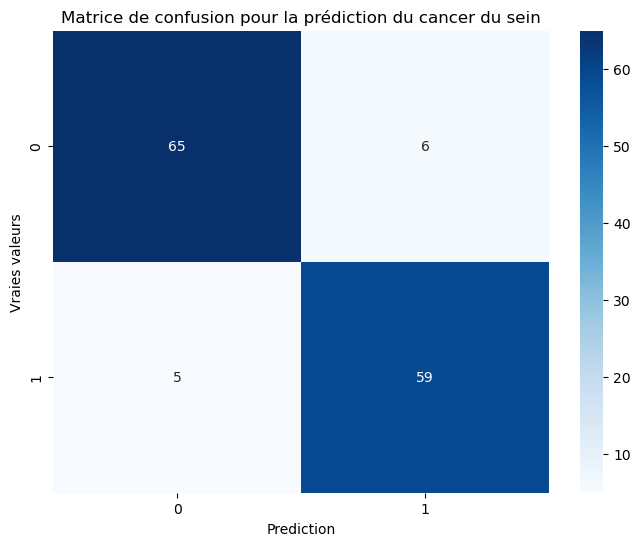

In [100]:
cm = confusion_matrix(y_test, y_pred)

# Representation du modèle
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='g',cmap='Blues')
plt.xlabel('Prediction')
plt.ylabel('Vraies valeurs')
plt.title('Matrice de confusion pour la prédiction du cancer du sein')
plt.show()

In [101]:
# Calcul de l'exactitude du modèle
accuracy_score(y_test, y_pred)

0.9185185185185185

In [104]:
# Mesure de la performance du modèle
roc_auc_score(y_test, y_pred)

0.9186839788732394